Baseline vs Tuned Comparison:
                  RMSE_Baseline  RMSE_Tuned  MAE_Baseline  MAE_Tuned  \
CatBoost                30.4040      4.6640       25.6335     1.9603   
LightGBM                30.9670      3.5360       25.9658     1.6425   
RandomForest            29.5086      4.7589       25.0231     1.9025   
GradientBoosting        29.7154      4.2966       25.4383     2.1490   
XGBoost                 33.8303      4.0003       28.0538     1.5326   

                  R2_Baseline  R2_Tuned  
CatBoost              -0.1432    0.9731  
LightGBM              -0.1859    0.9845  
RandomForest          -0.0768    0.9720  
GradientBoosting      -0.0920    0.9772  
XGBoost               -0.4153    0.9802  


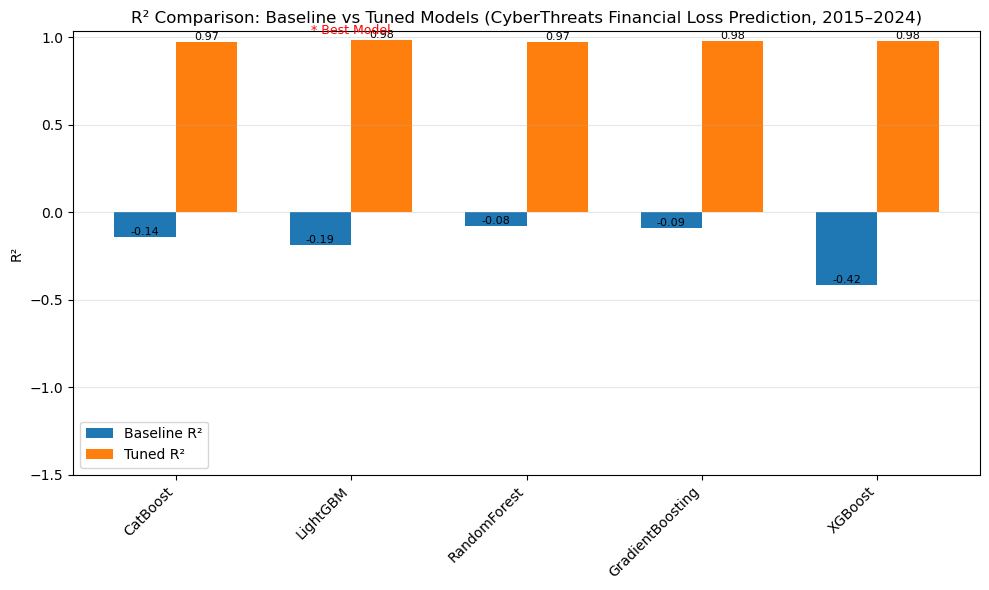

In [2]:
# Step6_baseline_vs_tuned_fixed.ipynb

import os
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# Paths
# ---------------------------
PROJECT_ROOT = r"C:\Users\uthay\Desktop\CyberThreats_FinancialLoss_Prediction_ML"
PROCESSED_PATH = os.path.join(PROJECT_ROOT, "data", "processed")

baseline_file = os.path.join(PROCESSED_PATH, "model_results_step3.csv")
tuned_file = os.path.join(PROCESSED_PATH, "model_results_step4.csv")

# ---------------------------
# Load results
# ---------------------------
df_base = pd.read_csv(baseline_file, index_col=0)
df_tuned = pd.read_csv(tuned_file, index_col=0)

# Ensure tuned R² is numeric
df_tuned["R2"] = pd.to_numeric(df_tuned["R2"], errors="coerce")

# Align models present in both steps
common_models = [m for m in df_base.index if m in df_tuned.index]
df_base = df_base.loc[common_models]
df_tuned = df_tuned.loc[common_models]

# ---------------------------
# Merge for comparison table
# ---------------------------
comp_df = df_base.add_suffix("_Baseline").join(df_tuned.add_suffix("_Tuned"))
comp_df = comp_df[[
    "RMSE_Baseline", "RMSE_Tuned",
    "MAE_Baseline", "MAE_Tuned",
    "R2_Baseline", "R2_Tuned"
]].round(4)

print("Baseline vs Tuned Comparison:")
print(comp_df)

# Save comparison table
comp_df.to_csv(os.path.join(PROCESSED_PATH, "baseline_vs_tuned_step6.csv"))

# ---------------------------
# Use full model names for x-axis
# ---------------------------
labels = common_models  # full names directly

# ---------------------------
# Plot R² comparison
# ---------------------------
plt.figure(figsize=(10, 6))
x = range(len(common_models))
width = 0.35

bars_base = plt.bar([i - width/2 for i in x], df_base["R2"], width,
                    label="Baseline R²", color="#1f77b4")
bars_tuned = plt.bar([i + width/2 for i in x], df_tuned["R2"], width,
                     label="Tuned R²", color="#ff7f0e")

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height,
                 f"{height:.2f}", ha='center', va='bottom', fontsize=8)

add_labels(bars_base)
add_labels(bars_tuned)

# Axis tweaks
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylim(-1.5, max(df_tuned["R2"].dropna()) + 0.05)
plt.ylabel("R²")

# Title and context
plt.title("R² Comparison: Baseline vs Tuned Models (CyberThreats Financial Loss Prediction, 2015–2024)")
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Highlight best-performing model
best_idx = df_tuned["R2"].idxmax()
best_label = best_idx  # full name
best_val = df_tuned.loc[best_idx, "R2"]
plt.text(labels.index(best_label), best_val + 0.02,
         "* Best Model", ha='center', va='bottom', fontsize=9, color='red')

plt.tight_layout()
plt.show()